In [2]:
import pandas as pd
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from seaborn import heatmap
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.svm import SVC

### cleaning:

In [3]:
df_cancer = pd.read_csv(r"C:\Users\user\Desktop\knn_first_proj\cancer (1).csv")
df_cancer

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
565,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
566,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
567,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


In [4]:
del df_cancer['Id']


In [5]:
df_cancer.columns

Index(['Diagnosis', 'Radius (mean)', 'Texture (mean)', 'Perimeter (mean)',
       'Area (mean)', 'Smoothness (mean)', 'Compactness (mean)',
       'Concavity (mean)', 'Concave points (mean)', 'Symmetry (mean)',
       'Fractal dimension (mean)', 'Radius (se)', 'Texture (se)',
       'Perimeter (se)', 'Area (se)', 'Smoothness (se)', 'Compactness (se)',
       'Concavity (se)', 'Concave points (se)', 'Symmetry (se)',
       'Fractal dimension (se)', 'Radius (worst)', 'Texture (worst)',
       'Perimeter (worst)', 'Area (worst)', 'Smoothness (worst)',
       'Compactness (worst)', 'Concavity (worst)', 'Concave points (worst)',
       'Symmetry (worst)', 'Fractal dimension (worst)'],
      dtype='object')

In [6]:
df_cancer['Diagnosis'] = df_cancer['Diagnosis'].apply(lambda x:0 if x=='B' else 1 )


### Scaling Data:


In [ ]:
scaler = MinMaxScaler()

In [8]:
df_cancer = pd.DataFrame(scaler.fit_transform(df_cancer.values), columns=df_cancer.columns)


In [9]:
df_cancer

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,0.0,0.310426,0.157254,0.301776,0.179343,0.407692,0.189896,0.156139,0.237624,0.416667,...,0.255425,0.192964,0.245480,0.129276,0.480948,0.145540,0.190895,0.442612,0.278336,0.115112
1,0.0,0.288655,0.202908,0.289130,0.159703,0.495351,0.330102,0.107029,0.154573,0.458081,...,0.233725,0.225746,0.227501,0.109443,0.396421,0.242852,0.150958,0.250275,0.319141,0.175718
2,0.0,0.119409,0.092323,0.114367,0.055313,0.449309,0.139685,0.069260,0.103181,0.381313,...,0.081821,0.097015,0.073310,0.031877,0.404345,0.084903,0.070823,0.213986,0.174453,0.148826
3,0.0,0.286289,0.294555,0.268261,0.161315,0.335831,0.056070,0.060028,0.145278,0.205556,...,0.191035,0.287580,0.169580,0.088650,0.170640,0.018337,0.038602,0.172268,0.083185,0.043618
4,0.0,0.057504,0.241123,0.054730,0.024772,0.301255,0.122845,0.037207,0.029409,0.358081,...,0.036784,0.264925,0.034115,0.014009,0.386515,0.105180,0.054952,0.088110,0.303568,0.124951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,0.659709,0.520122,0.685578,0.510498,0.517017,0.626403,0.743674,0.732604,0.550000,...,0.581999,0.463486,0.640918,0.401543,0.459156,0.379651,0.527077,0.873540,0.268874,0.286567
565,1.0,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
566,1.0,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
567,1.0,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909


### feature selection

In [10]:
k_best = SelectKBest(f_classif, k=2)
x = k_best.fit(X=df_cancer.iloc[:, 1:32],y=df_cancer['Diagnosis'])
x.get_feature_names_out()

array(['Perimeter (worst)', 'Concave points (worst)'], dtype=object)

### training part : unsupervised


In [296]:
X_train ,X_test ,y_train, y_test = train_test_split(df_cancer[['Perimeter (worst)', 'Concave points (worst)']],df_cancer['Diagnosis'],test_size=.2, random_state=42)

#### kmeans

In [116]:
clus = KMeans(n_clusters=2, random_state=42)
clus.fit(X_train)

KMeans(n_clusters=2, random_state=42)

C:\Users\user\Desktop\knn_first_proj\knn_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\user\Desktop\knn_first_proj\knn_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


-3.0486869049685623

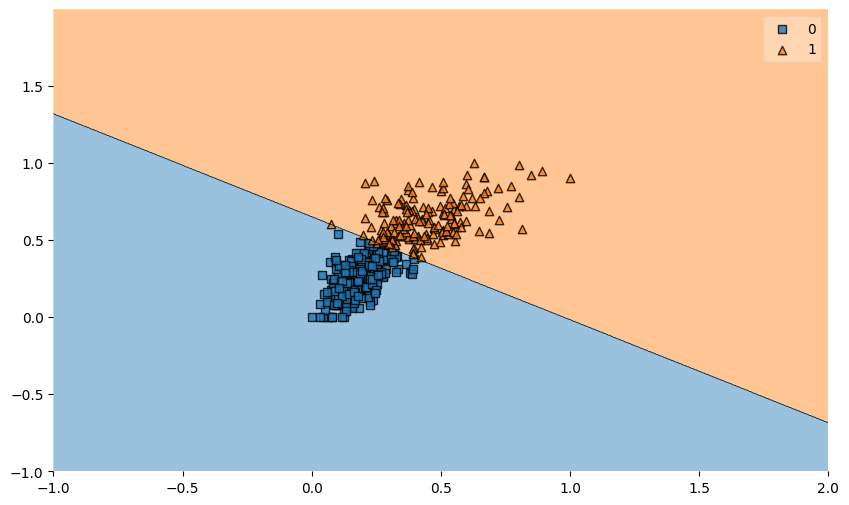

In [117]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clus.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plot_decision_regions(np.array(X_train), clus.labels_, clf=clus, legend=1)

In [77]:
[column for column in df_cancer.columns if '(mean)' in column]


['Radius (mean)',
 'Texture (mean)',
 'Perimeter (mean)',
 'Area (mean)',
 'Radius (mean)',
 'Texture (mean)',
 'Perimeter (mean)',
 'Area (mean)',
 'Radius (mean)',
 'Texture (mean)',
 'Perimeter (mean)',
 'Area (mean)',
 'Radius (mean)',
 'Texture (mean)',
 'Perimeter (mean)',
 'Area (mean)']

In [348]:
fig, ax = plt.subplots(figsize=(100,100))
heatmap(df_cancer[['Radius (mean)',
 'Texture (mean)',
 'Perimeter (mean)',
 'Area (mean)',
 'Radius (mean)',
 'Texture (mean)',
 'Perimeter (mean)',
 'Area (mean)',
 'Radius (mean)',
 'Texture (mean)',
 'Perimeter (mean)',
 'Area (mean)',
 'Radius (mean)',
 'Texture (mean)',
 'Perimeter (mean)',
 'Area (mean)']].corr(method='pearson'),cmap='coolwarm',center=0, ax=ax)

<Axes: >

In [283]:
svc = SVC(kernel='rbf', C=1020, random_state=42, gamma=540)
svc.fit(X_train, y_train)

SVC(C=1020, gamma=540, random_state=42)

In [285]:
svc.score(X_test,y_test)*100

94.73684210526315

C:\Users\user\Desktop\knn_first_proj\knn_venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


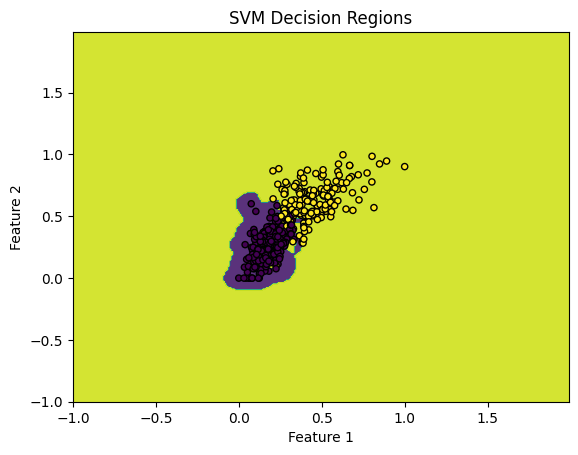

In [309]:
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha=0.9)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, s=20, edgecolor='black')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()